In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def parse_results(path):
    res = []
    with open(path, "r") as inp:
        for line in inp:
            if line.startswith("TIME"):
                _, t = line.split()
                res.append(float(t))
    return res

In [3]:
res = {
    "cbs": parse_results("CBS/results_CBS.txt"),
    "cbsh": parse_results("CBS/results_CBSH.txt"),
    "cbs_cp": parse_results("CBS/results_CBS_CP.txt"),
    "cbs_ds": parse_results("CBS_DS/results.txt")
}


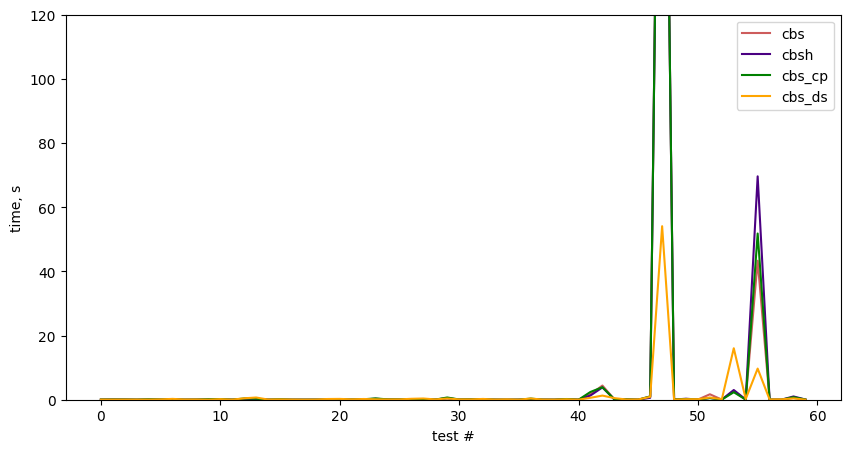

In [4]:
xv = np.arange(len(res["cbs"]))
colors = ["indianred", "indigo", "green", "orange"]

plt.figure(figsize=(10, 5))
for i, key in enumerate(res):
    plt.plot(xv, np.array(res[key]), label=key, color=colors[i])
plt.ylabel("time, s")
plt.xlabel("test #")
plt.legend()
plt.ylim(0, 120)
plt.show()

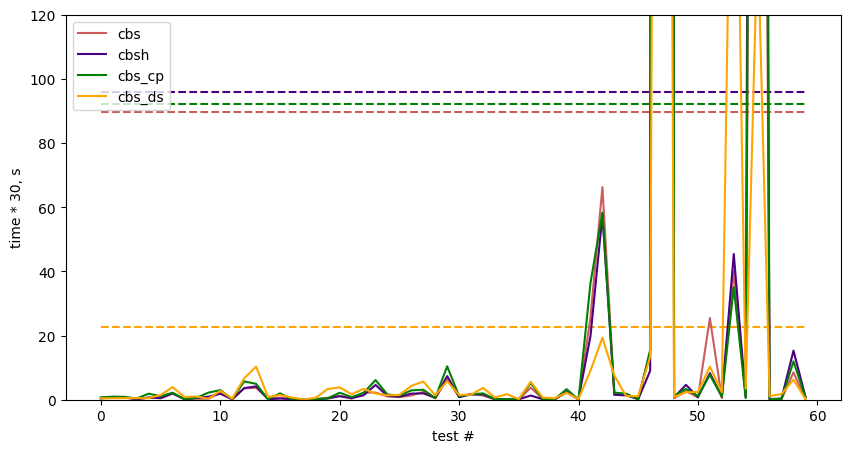

In [5]:
xv = np.arange(len(res["cbs"]))
colors = ["indianred", "indigo", "green", "orange"]

plt.figure(figsize=(10, 5))
for i, key in enumerate(res):
    plt.plot(xv, np.array(res[key]) * 15, label=key, color=colors[i])
    plt.hlines(np.mean(res[key]) * 15, 0, len(res[key]) - 1, color=colors[i], linestyle='dashed')
plt.ylabel("time * 30, s")
plt.xlabel("test #")
plt.legend()
plt.ylim(0, 120)
plt.show()

In [6]:
test_results = pd.DataFrame(res)
test_results.to_csv("test_results.csv")